In [1]:
!pip install rpy2
%load_ext rpy2.ipython


In [2]:
%%R
install.packages(c("ggplot2", "wordcloud", "scatterplot3d", "car"))
# Load libraries
library(ggplot2)
library(wordcloud)
library(scatterplot3d)
library(car)



(as ‘lib’ is unspecified)












































	‘/tmp/Rtmp2zHj1j/downloaded_packages’





In [3]:
%%R
# Load dataset
data <- read.csv("/content/HousingData.csv")
# Display first few rows
head(data)


     CRIM ZN INDUS CHAS   NOX    RM  AGE    DIS RAD TAX PTRATIO      B LSTAT
1 0.00632 18  2.31    0 0.538 6.575 65.2 4.0900   1 296    15.3 396.90  4.98
2 0.02731  0  7.07    0 0.469 6.421 78.9 4.9671   2 242    17.8 396.90  9.14
3 0.02729  0  7.07    0 0.469 7.185 61.1 4.9671   2 242    17.8 392.83  4.03
4 0.03237  0  2.18    0 0.458 6.998 45.8 6.0622   3 222    18.7 394.63  2.94
5 0.06905  0  2.18    0 0.458 7.147 54.2 6.0622   3 222    18.7 396.90    NA
6 0.02985  0  2.18    0 0.458 6.430 58.7 6.0622   3 222    18.7 394.12  5.21
  MEDV
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7


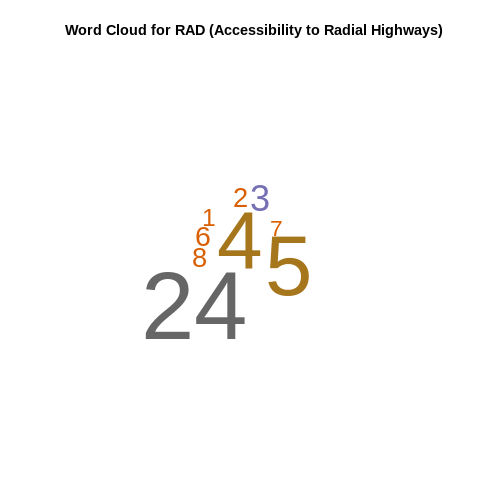

In [11]:
%%R
# Creating a word cloud for RAD (accessibility to radial highways)
rad_count <- table(data$RAD)  # Count frequencies for RAD
wordcloud(names(rad_count), freq = as.vector(rad_count), min.freq = 1, scale = c(8, 1),
          colors = brewer.pal(8, "Dark2"))

# Adding title
title("Word Cloud for RAD (Accessibility to Radial Highways)")


**Observation : This word cloud will visually show the distribution of houses across different levels of accessibility to radial highways. The larger the word, the more houses in that category.**

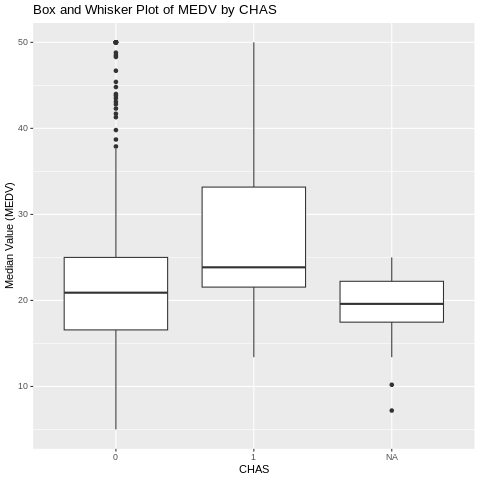

In [13]:
%%R
# Boxplot of MEDV by CHAS
ggplot(data, aes(x = factor(CHAS), y = MEDV)) +
  geom_boxplot() +
  xlab("CHAS") +
  ylab("Median Value (MEDV)") +
  ggtitle("Box and Whisker Plot of MEDV by CHAS")


**Observation : The boxplot will show how house prices differ between properties that are and aren't adjacent to the Charles River.**

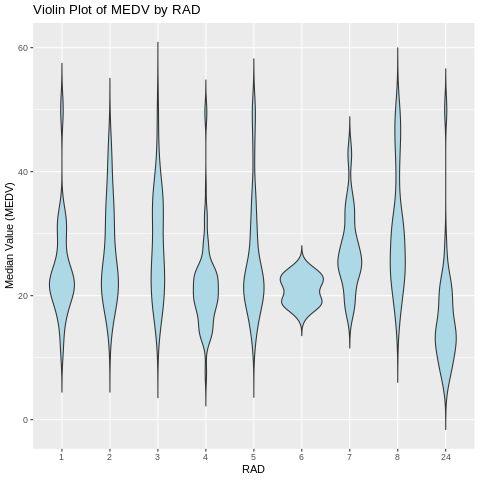

In [14]:
%%R
# Violin plot of MEDV by RAD
ggplot(data, aes(x = factor(RAD), y = MEDV)) +
  geom_violin(trim = FALSE, fill = "lightblue") +
  xlab("RAD") +
  ylab("Median Value (MEDV)") +
  ggtitle("Violin Plot of MEDV by RAD")


**Observation : The violin plot gives a more detailed distribution of home prices based on accessibility to highways.**

`geom_smooth()` using formula = 'y ~ x'


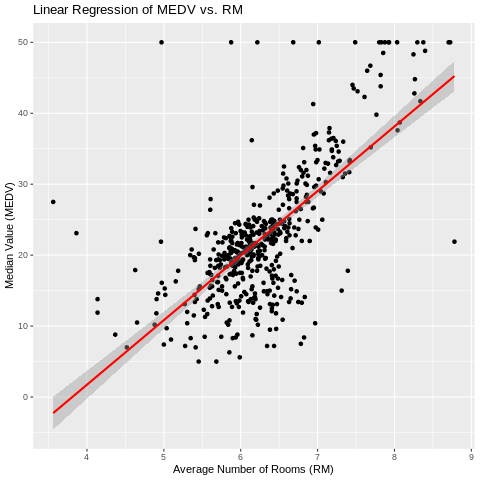

In [15]:
%%R
# Linear regression plot of MEDV and RM
ggplot(data, aes(x = RM, y = MEDV)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  xlab("Average Number of Rooms (RM)") +
  ylab("Median Value (MEDV)") +
  ggtitle("Linear Regression of MEDV vs. RM")


**Observation : A positive linear relationship can be observed between the number of rooms and the median house value.**

`geom_smooth()` using formula = 'y ~ x'


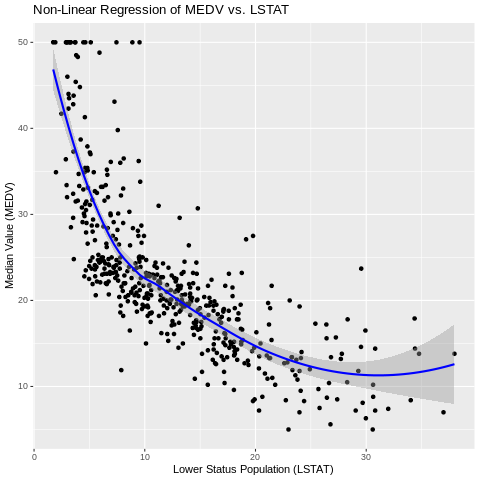

In [16]:
%%R
# Non-linear regression plot of MEDV and LSTAT
ggplot(data, aes(x = LSTAT, y = MEDV)) +
  geom_point() +
  geom_smooth(method = "loess", col = "blue") +
  xlab("Lower Status Population (LSTAT)") +
  ylab("Median Value (MEDV)") +
  ggtitle("Non-Linear Regression of MEDV vs. LSTAT")


**Observation : The non-linear regression shows a decreasing trend between LSTAT and MEDV, indicating lower-priced houses in areas with a higher percentage of lower-status population.**

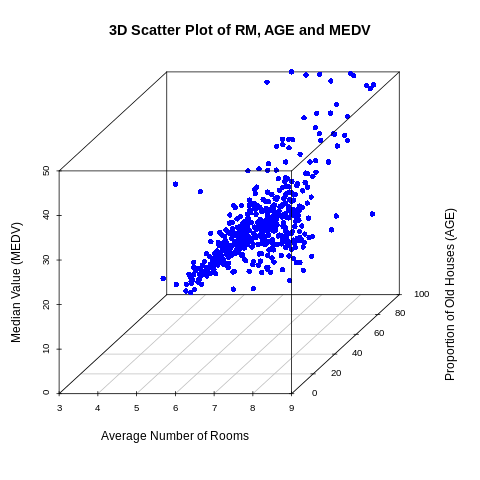

In [17]:
%%R
# 3D scatter plot
scatterplot3d(data$RM, data$AGE, data$MEDV, pch = 16, color = "blue",
              xlab = "Average Number of Rooms",
              ylab = "Proportion of Old Houses (AGE)",
              zlab = "Median Value (MEDV)",
              main = "3D Scatter Plot of RM, AGE and MEDV")


**Observation : The 3D plot helps identify relationships between the number of rooms, the age of houses, and house values.**

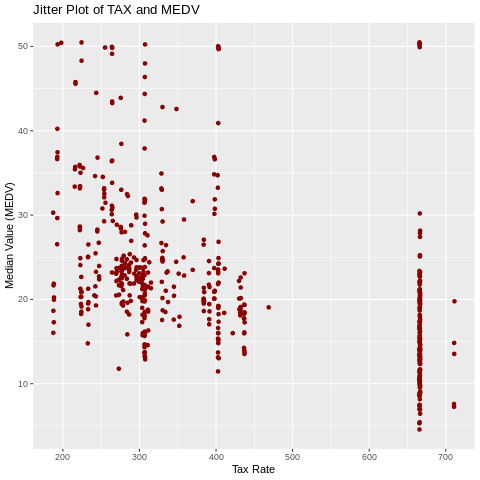

In [18]:
%%R
# Jitter plot of TAX and MEDV
ggplot(data, aes(x = TAX, y = MEDV)) +
  geom_jitter(width = 0.5, height = 0.5, color = "darkred") +
  xlab("Tax Rate") +
  ylab("Median Value (MEDV)") +
  ggtitle("Jitter Plot of TAX and MEDV")


**Observation : The jitter plot spreads out data points to better visualize clusters or dense areas in the tax rates and house values.**